## IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## Working with Data

Loading Data

In [2]:
heart_data_set = pd.read_csv("heart.csv")

Viewing Dataset

In [3]:
heart_data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking Shape

In [4]:
heart_data_set.shape

(303, 14)

Information On Data

In [5]:
heart_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Checking for missing values

In [6]:
heart_data_set.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
heart_data_set.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


0 is for healthy heart

1 is for unhealthy heart

In [9]:
heart_data_set['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Checking Graphs of data for detailed view

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

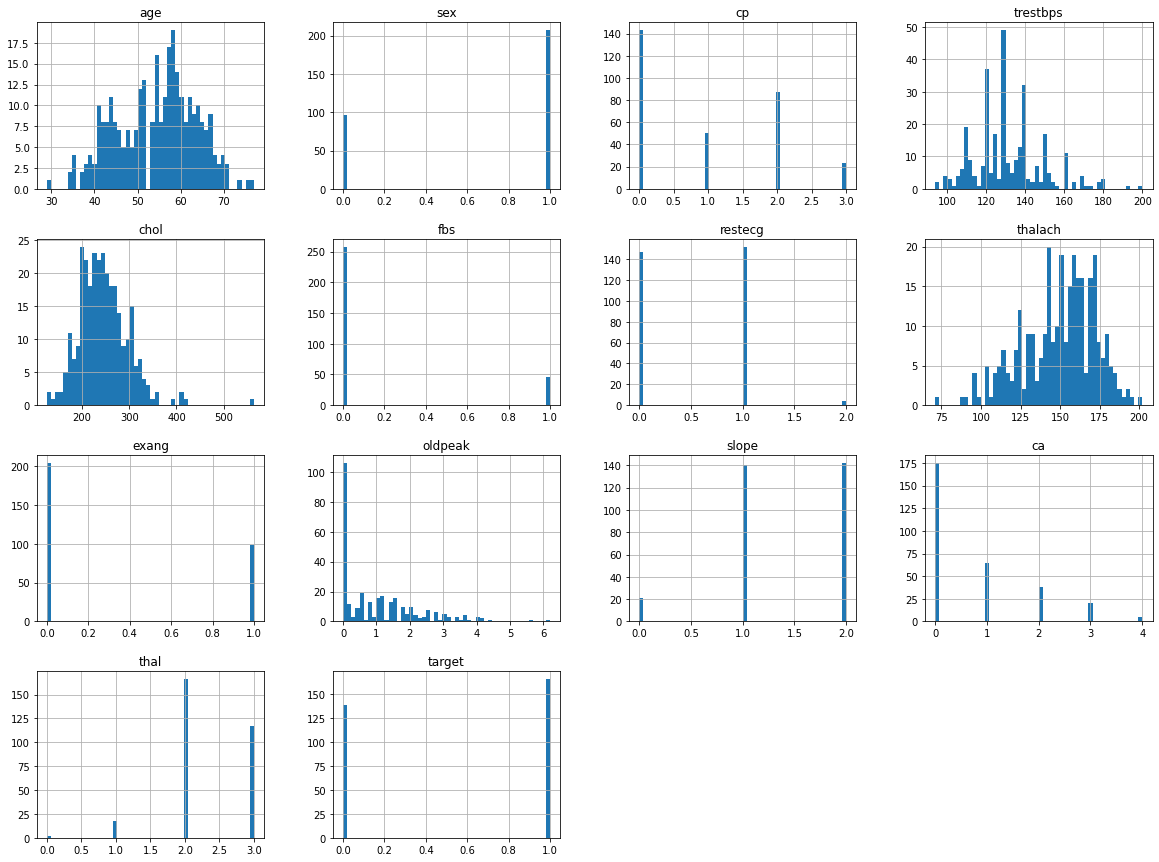

In [10]:
heart_data_set.hist(bins=50, figsize=(20,15))

In [11]:
x = heart_data_set.drop(columns='target', axis=1)

In [12]:
y = heart_data_set['target']

In [13]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Creating training and test data for working on model

In [15]:
train_set_x,test_set_x,train_set_y,test_set_y = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [16]:
heart_data_set.shape,train_set_x.shape,test_set_x.shape

((303, 14), (242, 13), (61, 13))

In [17]:
train_set_x['sex'].value_counts()

1    165
0     77
Name: sex, dtype: int64

In [18]:
test_set_x['sex'].value_counts()

1    42
0    19
Name: sex, dtype: int64

In [19]:
train_set_y.value_counts()

1    132
0    110
Name: target, dtype: int64

In [20]:
test_set_y.value_counts()

1    33
0    28
Name: target, dtype: int64

In [21]:
165/77,42/19,132/110,33/28

(2.142857142857143, 2.210526315789474, 1.2, 1.1785714285714286)

They are divided almost equally

Training Model

In [22]:
train_set_x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [23]:
train_set_y.head()

19     1
247    0
289    0
288    0
60     1
Name: target, dtype: int64

### Finding Correlations as it is small dataset and we can see the insights

In [24]:
corr_matrix = heart_data_set.corr()

In [25]:
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [26]:
from pandas.plotting import scatter_matrix

In [27]:
attributes=["target","cp","thalach","exang","oldpeak"]

array([[<AxesSubplot:xlabel='target', ylabel='target'>,
        <AxesSubplot:xlabel='cp', ylabel='target'>,
        <AxesSubplot:xlabel='thalach', ylabel='target'>,
        <AxesSubplot:xlabel='exang', ylabel='target'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='target'>],
       [<AxesSubplot:xlabel='target', ylabel='cp'>,
        <AxesSubplot:xlabel='cp', ylabel='cp'>,
        <AxesSubplot:xlabel='thalach', ylabel='cp'>,
        <AxesSubplot:xlabel='exang', ylabel='cp'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='cp'>],
       [<AxesSubplot:xlabel='target', ylabel='thalach'>,
        <AxesSubplot:xlabel='cp', ylabel='thalach'>,
        <AxesSubplot:xlabel='thalach', ylabel='thalach'>,
        <AxesSubplot:xlabel='exang', ylabel='thalach'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='thalach'>],
       [<AxesSubplot:xlabel='target', ylabel='exang'>,
        <AxesSubplot:xlabel='cp', ylabel='exang'>,
        <AxesSubplot:xlabel='thalach', ylabel='exang'>,
        <AxesSubplo

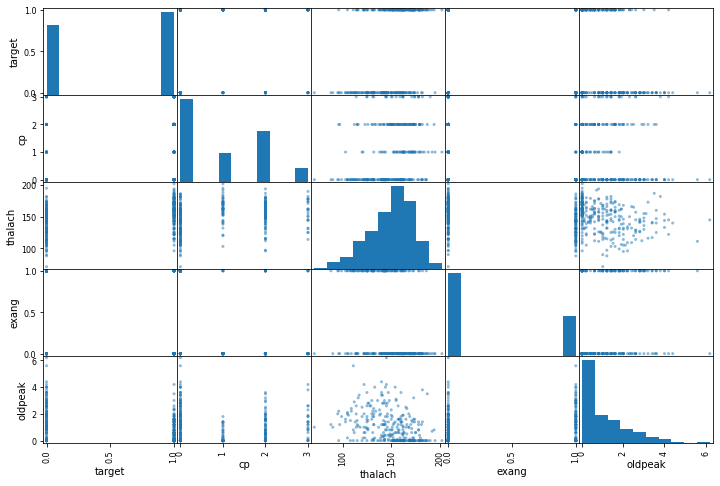

In [28]:
scatter_matrix(heart_data_set[attributes],figsize=(12,8))

<AxesSubplot:xlabel='chol', ylabel='age'>

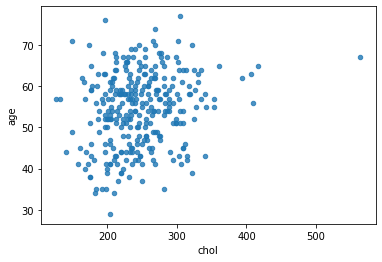

In [29]:
heart_data_set.plot(kind="scatter",x="chol",y="age",alpha=0.8)

## Model Creation

Logistic Regression

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [31]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [32]:
imputer = SimpleImputer(strategy="median")
imputer.fit(train_set_x)
x = imputer.transform(train_set_x)
heart_tr = pd.DataFrame(x,columns=train_set_x.columns)

In [33]:
heart_num_tr = my_pipeline.fit_transform(train_set_x)

In [34]:
heart_num_tr.shape

(242, 13)

## Selecting Model

In [35]:
model = LogisticRegression()
# model = DecisionTreeRegressor()
# model = RandomForestClassifier()
# model = GaussianNB()
model.fit(train_set_x,train_set_y)

C:\Users\arnav\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
few_data = train_set_x.iloc[:5]
few_target = train_set_y.iloc[:5]

In [37]:
prepared_data = my_pipeline.transform(few_data)

In [38]:
model.predict(prepared_data)

C:\Users\arnav\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 0, 0, 1], dtype=int64)

In [39]:
list(few_target)

[1, 0, 0, 0, 1]

### Root mean squared model

In [40]:
from sklearn.metrics import mean_squared_error
heart_predictions = model.predict(train_set_x)
lin_mse = mean_squared_error(train_set_y, heart_predictions)
lin_rmse = np.sqrt(lin_mse)

#### Logistic Regression error is 0.396
#### Discision Tree is Overfitting because error is 0.0
#### RandomForestClassifier is Overfitting because error is 0.0
#### GaussianNB error is 0.396

In [41]:
lin_rmse

0.39626354032187944

#### Cross validation

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train_set_x, train_set_y, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

C:\Users\arnav\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arnav\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [43]:
rmse_scores

array([0.4       , 0.48989795, 0.5       , 0.40824829, 0.28867513,
       0.5       , 0.35355339, 0.35355339, 0.35355339, 0.40824829])

In [44]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [45]:
print_scores(rmse_scores)

Scores:  [0.4        0.48989795 0.5        0.40824829 0.28867513 0.5
 0.35355339 0.35355339 0.35355339 0.40824829]
Mean:  0.40557298358589955
Standard Deviation:  0.06839021605389395


### Logistic Regression
Scores:  [0.4        0.48989795 0.5        0.40824829 0.28867513 0.5
 0.35355339 0.35355339 0.35355339 0.40824829]
 
Mean:  0.40557298358589955

Standard Deviation:  0.06839021605389395
### Decision Tree
Scores:  [0.4472136  0.56568542 0.61237244 0.57735027 0.45643546 0.57735027
 0.45643546 0.45643546 0.5        0.5       ]
 
Mean:  0.5149278388287157

Standard Deviation:  0.05929576262984414
### RandomForestClassifier
Scores:  [0.4        0.56568542 0.5        0.40824829 0.35355339 0.5
 0.20412415 0.35355339 0.40824829 0.45643546]

Mean:  0.4149848396883081

Standard Deviation:  0.0955034876965366
### Nayve Bayes
Scores:  [0.4472136  0.4472136  0.45643546 0.40824829 0.35355339 0.45643546
 0.45643546 0.5        0.40824829 0.45643546]

Mean:  0.439021902087147

Standard Deviation:  0.03776818971635036

## We Chose Logistic Regression as model as it fits better

# Saving the model

In [46]:
from joblib import dump, load
dump(model, 'Heart.joblib')

['Heart.joblib']

## Model Evaluation

In [47]:
test_x_prepared = my_pipeline.transform(test_set_x)
final_predictions= model.predict(test_x_prepared)
final_mse = mean_squared_error(test_set_y,final_predictions)
final_rmse = np.sqrt(final_mse)

C:\Users\arnav\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
final_rmse

0.4435327625727437

In [49]:
print(final_predictions,list(test_set_y))

[0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1] [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1]


### Accuracy Score

In [50]:
prediction_train_x = model.predict(train_set_x)
train_data_acc = accuracy_score(prediction_train_x, train_set_y)

In [51]:
print('Accuracy score for training data: ', train_data_acc)

Accuracy score for training data:  0.8429752066115702


In [52]:
prediction_test_x = model.predict(test_set_x)
test_data_acc = accuracy_score(prediction_test_x, test_set_y)

In [53]:
print('Accuracy score for test data: ', test_data_acc)

Accuracy score for test data:  0.8032786885245902


LR 0.8032786885245902

DT 0.6885245901639344

RFC 0.8032786885245902

GNB 0.819672131147541